In [1]:
"""Setup for Fused_ZS6D"""
stride = 14
image_size_sd = 960
image_size_dino = 840
layer = 11
facet = 'token'
model_type = 'dinov2_vitb14'

In [2]:
from external.sd_dino.extractor_sd import load_model

# Instantiating the stable diffusion model:
model_sd, aug_sd = load_model(diffusion_ver="v1-5", image_size=image_size_sd, num_timesteps=100)


LatentDiffusion: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, con

/home/kilian/miniconda3/envs/zs6d_sd_dino/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
The checkpoint state_dict contains keys that are not used by the model:
  model_ema.{decay, num_updates}
backbone.feature_extractor.,category_head.clip.clip.,clip_head.clip.clip.
backbone.feature_projections.2.0.conv1.weight
backbone.feature_projections.2.0.shortcut.weight
backbone.feature_projections.3.0.conv1.weight
backbone.feature_projections.3.0.shortcut.weight
backbone.feature_projections.4.0.conv1.weight
backbone.feature_projections.4.0.shortcut.weight
backbone.feature_projections.5.0.conv1.weight
backbone.feature_projections.5.0.shortcut.weight


In [3]:
from zs6dsddino import ZS6DSdDino
import os
import json

# Loading the config file:
with open(os.path.join("./zs6d_configs/bop_eval_configs/cfg_ycbv_inference_bop_sd_dino.json"), "r") as f:
    config = json.load(f)

# Instantiating the pose estimator:
# This involves handing over the path to the templates_gt file and the corresponding object norm_factors.
pose_estimator_sd_dino = ZS6DSdDino(model_sd, aug_sd, image_size_dino, image_size_sd, layer, facet,
                                    config['templates_gt_path'], config['norm_factor_path'], model_type=model_type,
                                    stride=stride)


Using cache found in /home/kilian/.cache/torch/hub/facebookresearch_dinov2_main
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/kilian/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
100%|██████████| 21/21 [00:03<00:00,  6.13it/s]


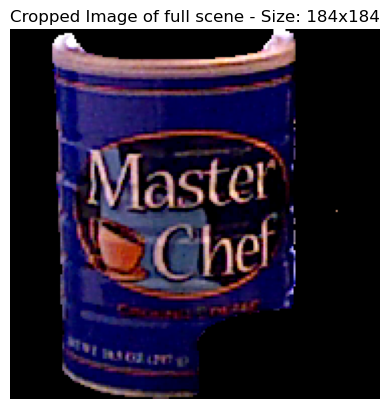

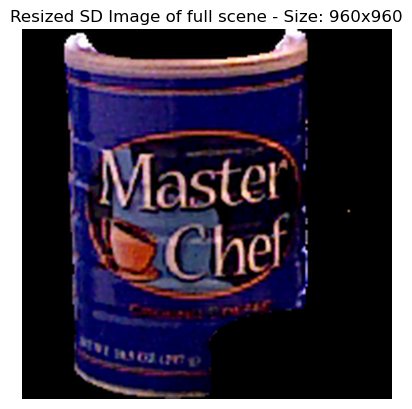

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


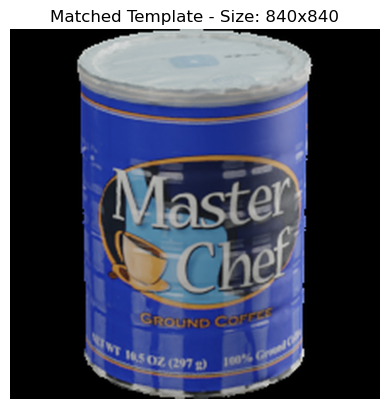

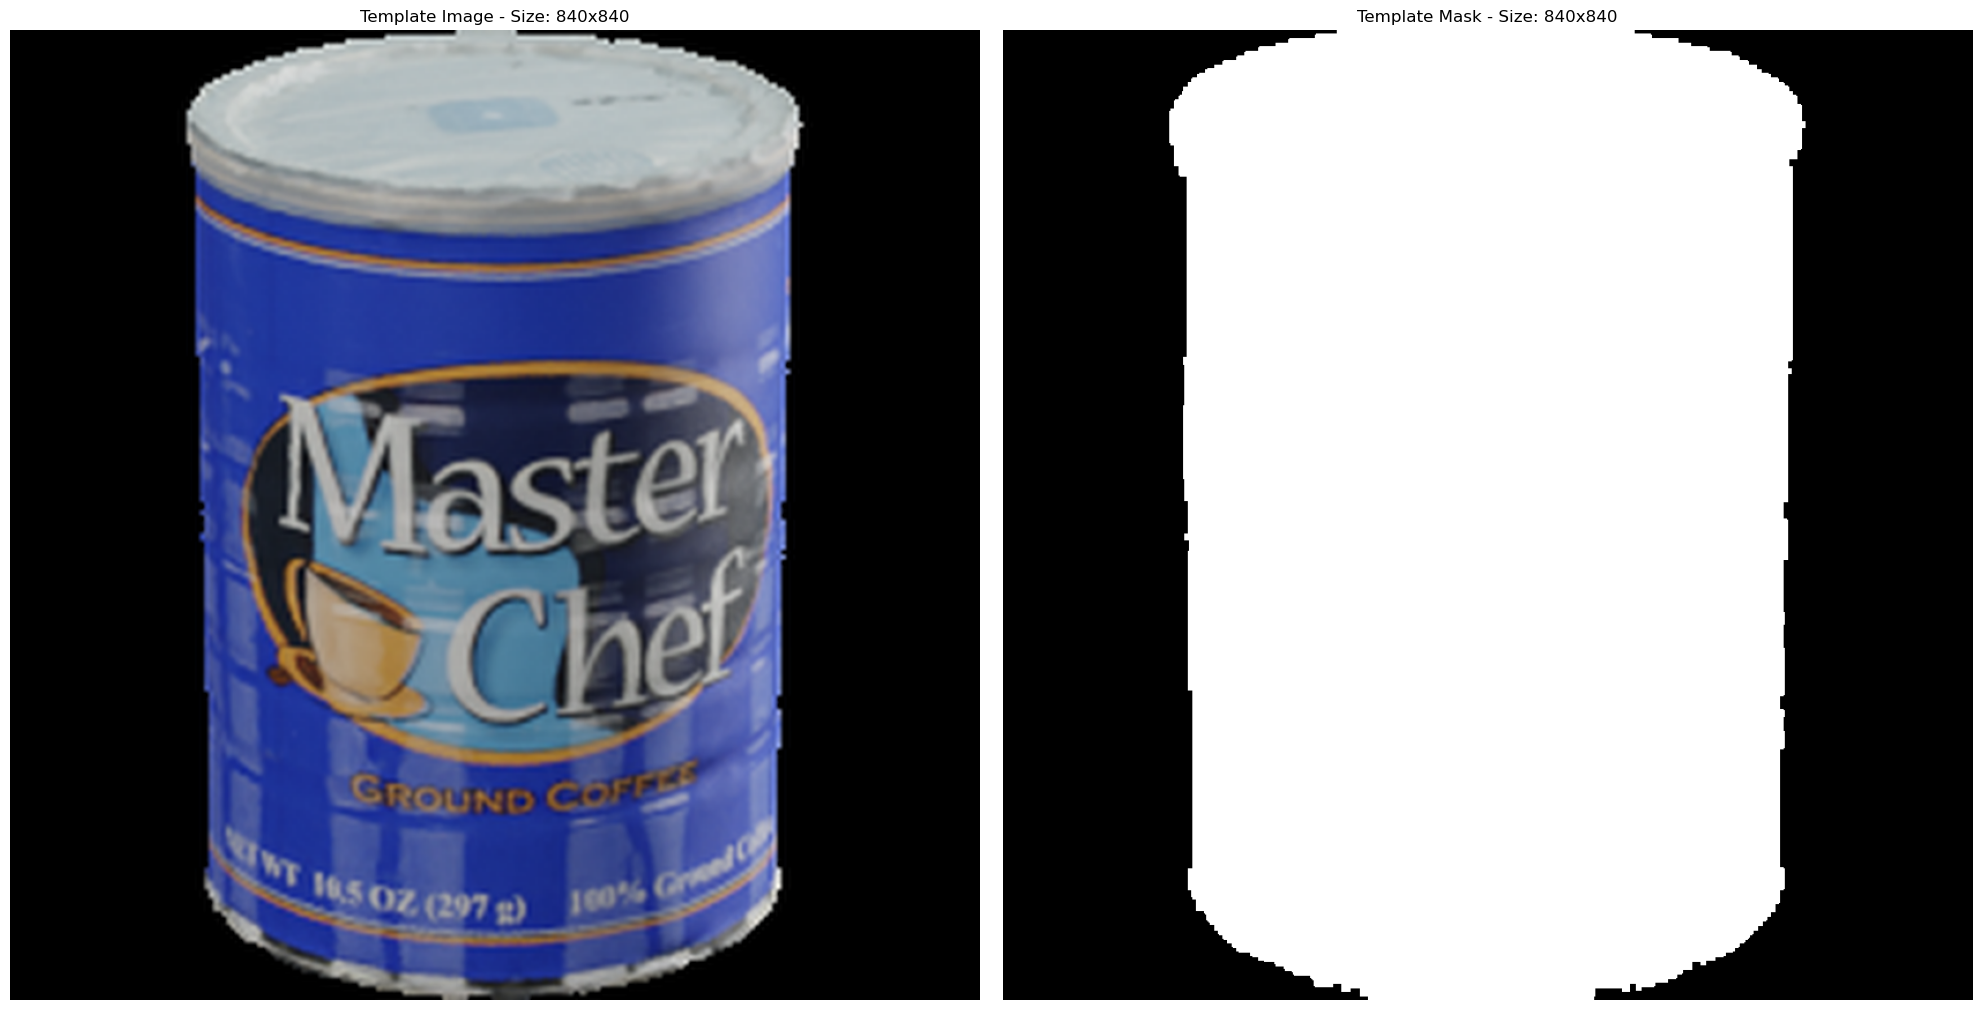

scale_factor:
0.21904761904761905
points1
[(1, 1), (1, 4), (1, 7), (1, 10), (1, 16), (1, 35), (1, 151), (16, 29), (4, 50), (16, 151), (157, 35), (145, 44), (170, 38), (145, 148), (182, 19), (1, 26), (1, 26), (1, 29), (96, 7), (1, 29), (1, 26), (1, 26), (1, 29), (176, 157), (72, 7), (19, 170), (170, 16), (170, 16), (7, 16), (1, 23), (1, 26), (1, 26), (1, 26), (1, 157), (161, 176), (72, 7), (161, 176), (139, 10), (139, 10), (151, 53), (151, 53), (151, 53), (56, 44), (90, 35), (90, 35), (90, 35), (65, 32), (1, 182), (1, 161), (1, 154), (1, 157), (1, 157), (1, 161), (1, 167), (1, 167), (1, 167), (1, 173), (1, 176), (1, 179), (1, 182), (1, 4), (4, 4), (1, 7), (1, 10), (1, 19), (1, 35), (53, 32), (16, 151), (7, 41), (16, 38), (90, 35), (157, 35), (148, 136), (151, 136), (182, 19), (4, 23), (1, 29), (1, 29), (133, 161), (133, 161), (1, 26), (1, 26), (1, 29), (32, 7), (56, 7), (13, 10), (170, 16), (170, 16), (7, 16), (4, 23), (1, 26), (1, 26), (26, 4), (29, 7), (161, 23), (161, 23), (56, 7), (

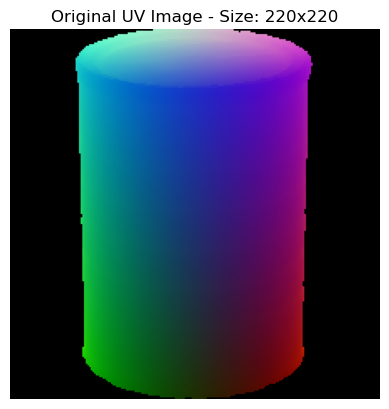

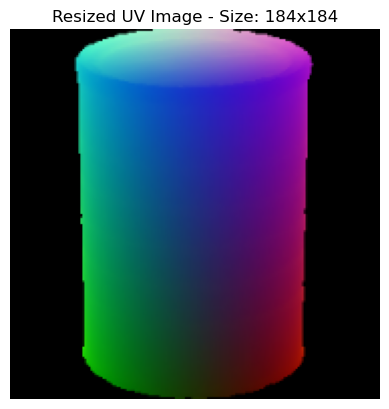

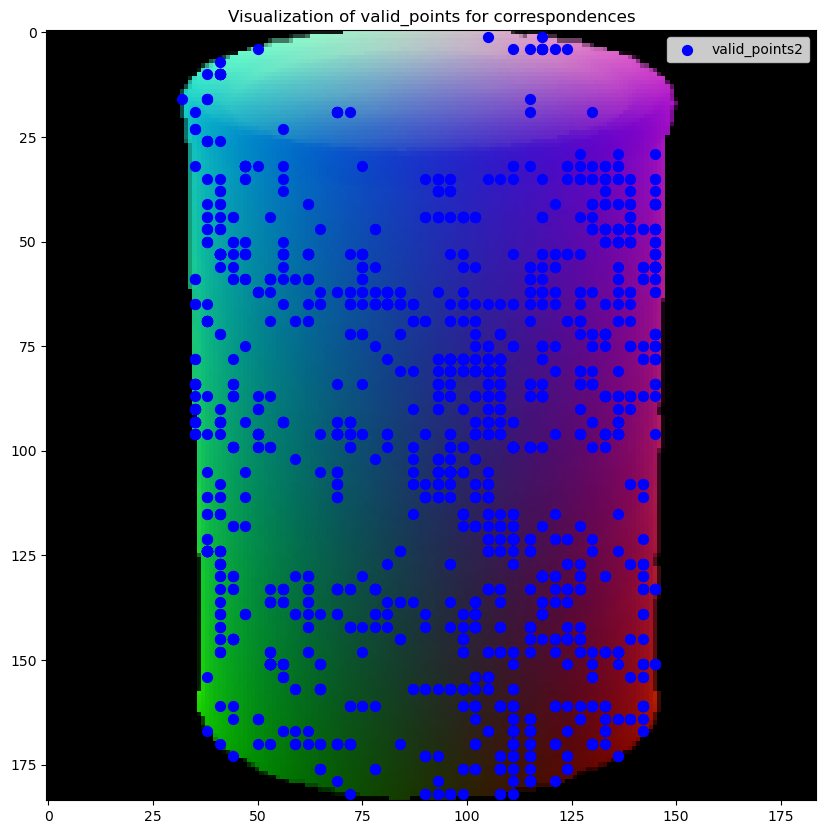

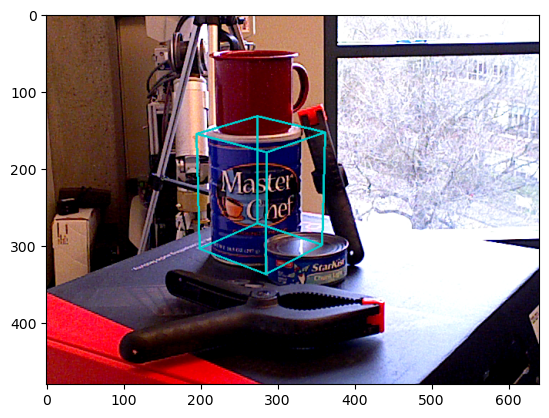

Pose estimation time: 10.165711879730225
R_est: [[ 0.63270539 -0.7742931   0.01241333]
 [-0.27121273 -0.23657618 -0.93299269]
 [ 0.7253465   0.58694285 -0.35968116]]
t_est: [-29.68173567  -9.81112346 948.23743665]


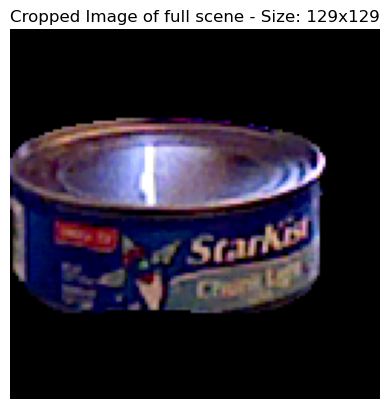

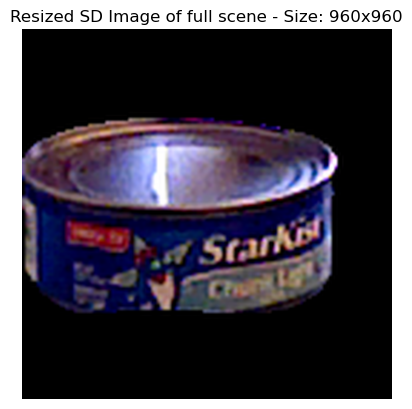

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


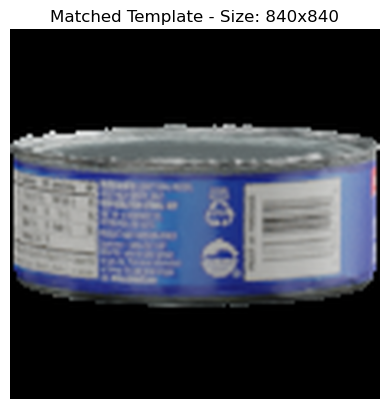

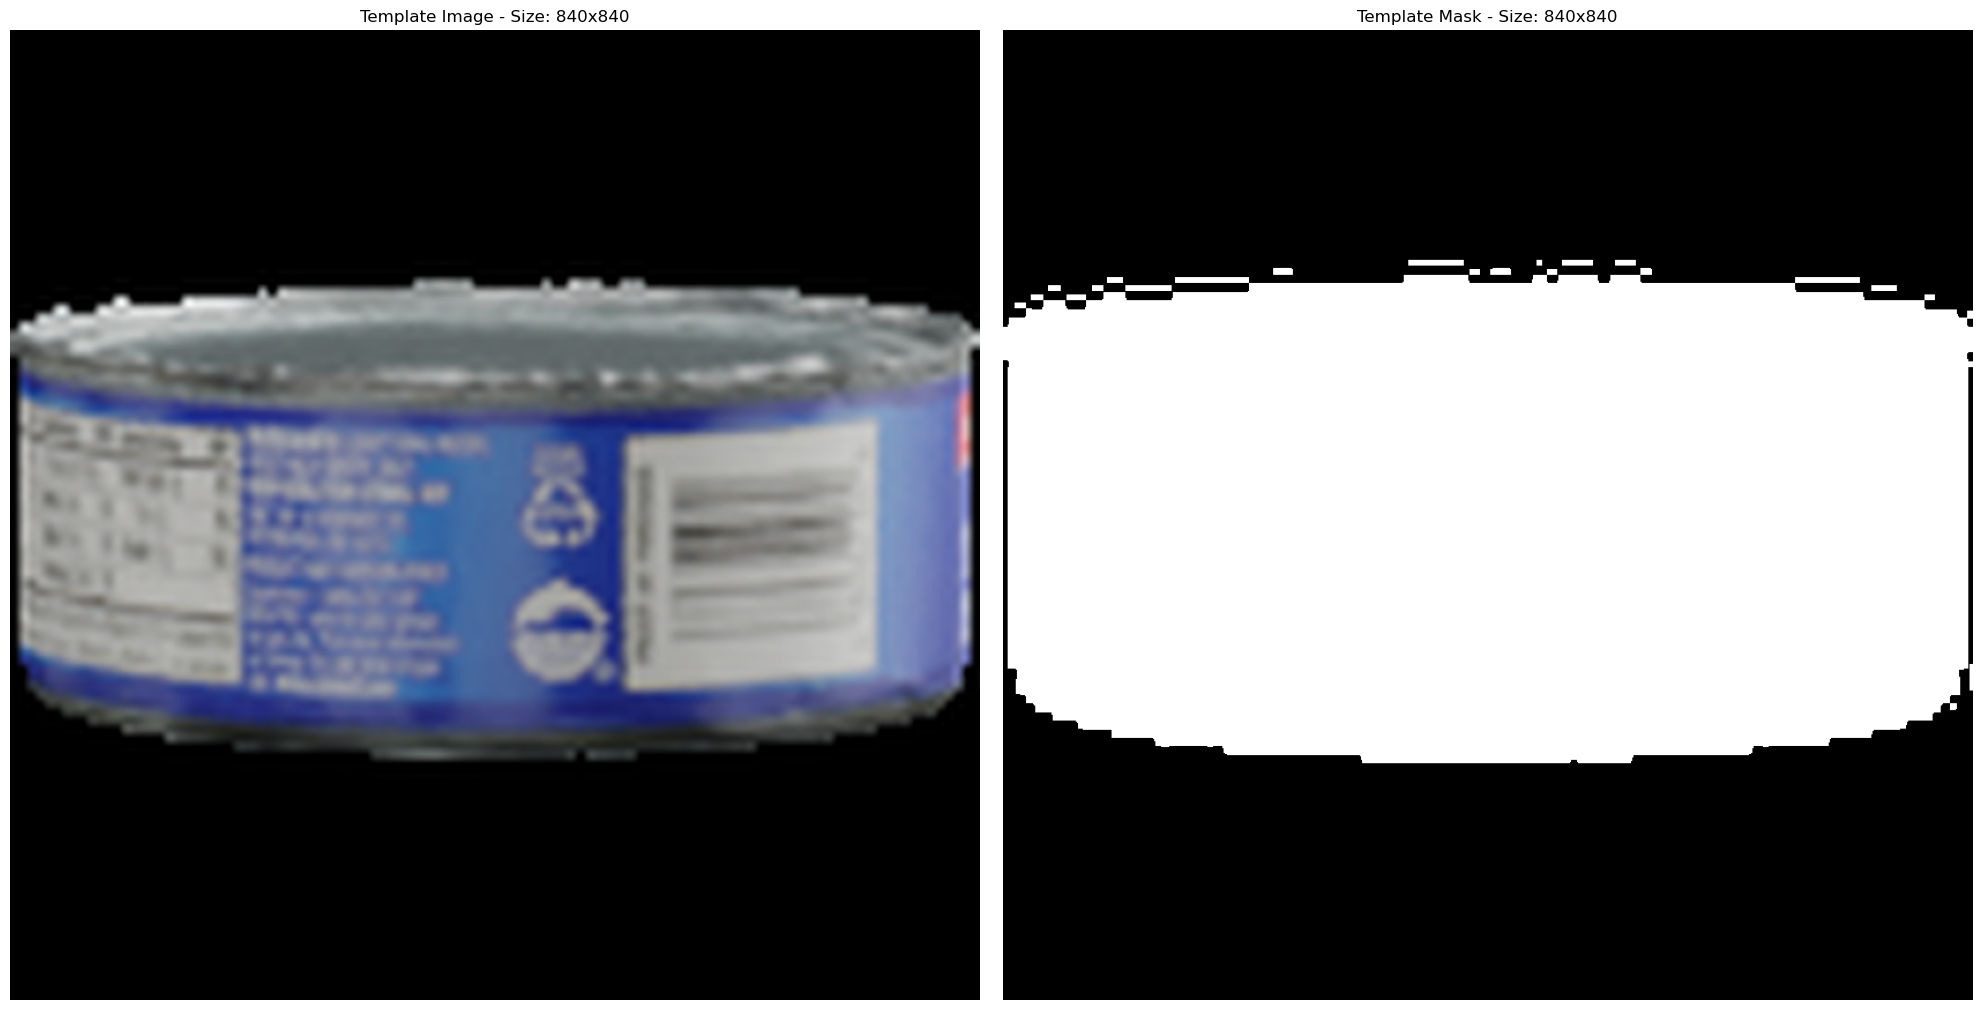

scale_factor:
0.15357142857142858
points1
[(3, 1), (1, 3), (1, 5), (1, 7), (1, 117), (1, 119), (1, 13), (1, 18), (1, 18), (1, 20), (1, 22), (1, 24), (1, 26), (1, 29), (1, 31), (1, 33), (1, 46), (1, 48), (1, 39), (1, 56), (1, 59), (1, 56), (1, 56), (1, 56), (1, 56), (1, 56), (1, 56), (1, 61), (1, 61), (1, 61), (1, 65), (1, 67), (1, 67), (1, 69), (1, 74), (1, 80), (1, 78), (1, 80), (1, 82), (1, 84), (1, 87), (1, 89), (1, 91), (1, 93), (1, 95), (1, 97), (1, 117), (1, 117), (1, 104), (1, 106), (1, 108), (1, 108), (1, 106), (1, 115), (1, 119), (1, 119), (1, 104), (1, 108), (1, 125), (1, 125), (3, 1), (1, 3), (5, 3), (3, 7), (3, 11), (3, 11), (3, 13), (3, 18), (3, 20), (3, 20), (3, 22), (3, 24), (3, 29), (3, 29), (3, 31), (3, 33), (3, 46), (3, 48), (3, 39), (3, 39), (3, 44), (18, 63), (18, 63), (20, 65), (20, 65), (18, 63), (18, 63), (3, 63), (3, 61), (3, 59), (3, 67), (3, 72), (5, 67), (3, 72), (3, 74), (3, 76), (3, 78), (3, 80), (3, 82), (3, 84), (3, 87), (3, 89), (3, 91), (3, 93), (3, 95)

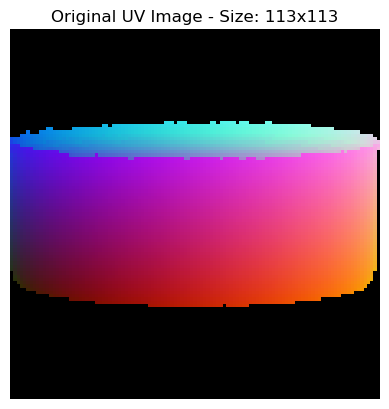

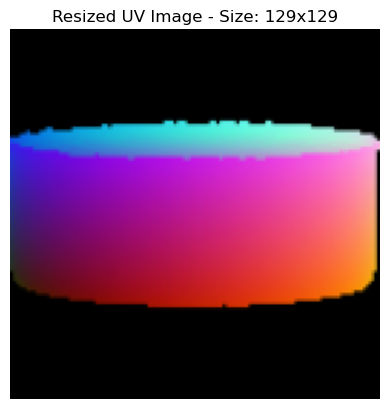

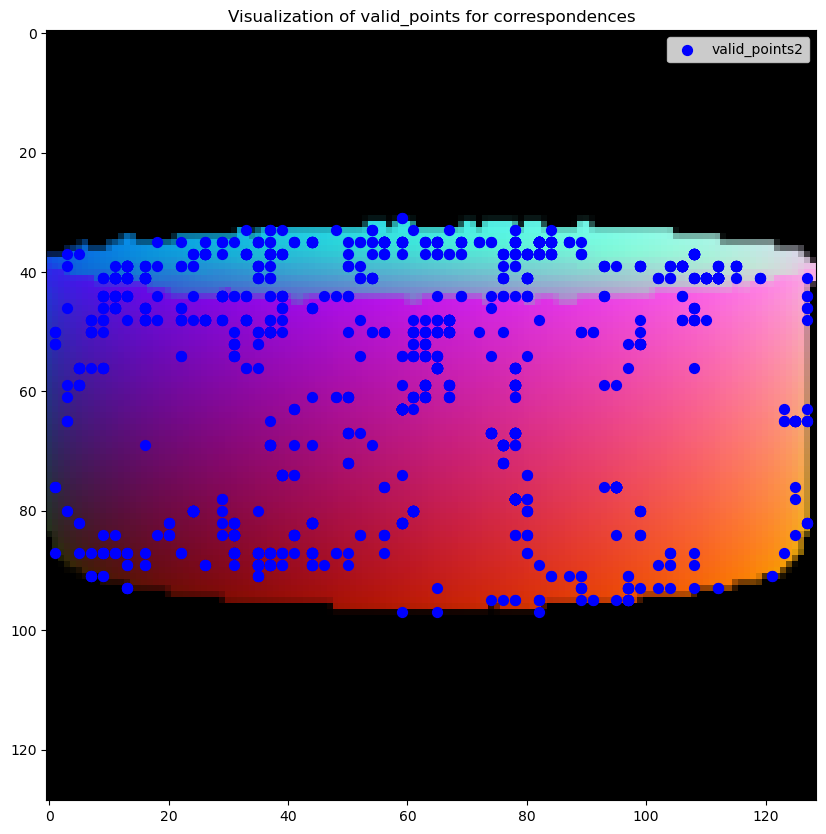

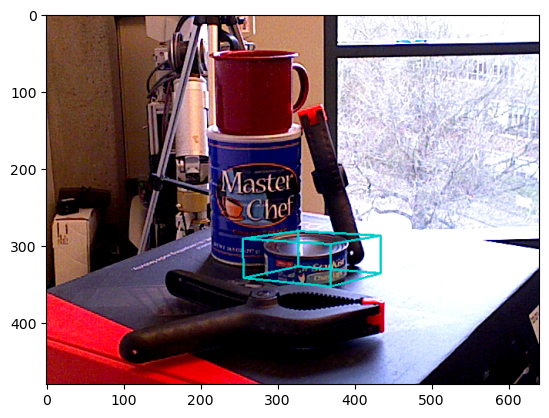

Pose estimation time: 7.084267616271973
R_est: [[ 0.83226303  0.5543705  -0.00340553]
 [ 0.02531836 -0.04414494 -0.99870426]
 [-0.55380252  0.83109841 -0.05077596]]
t_est: [ 22.36020099  48.13195207 703.32463249]


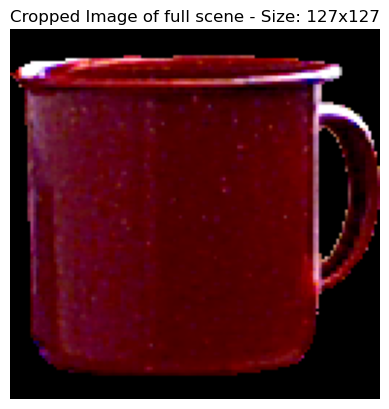

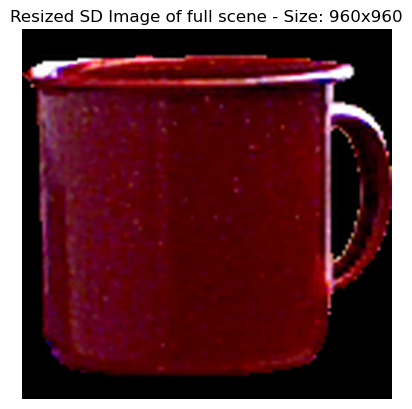

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


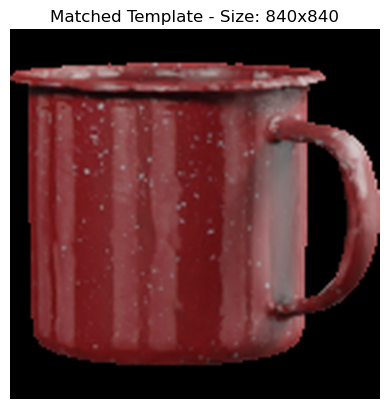

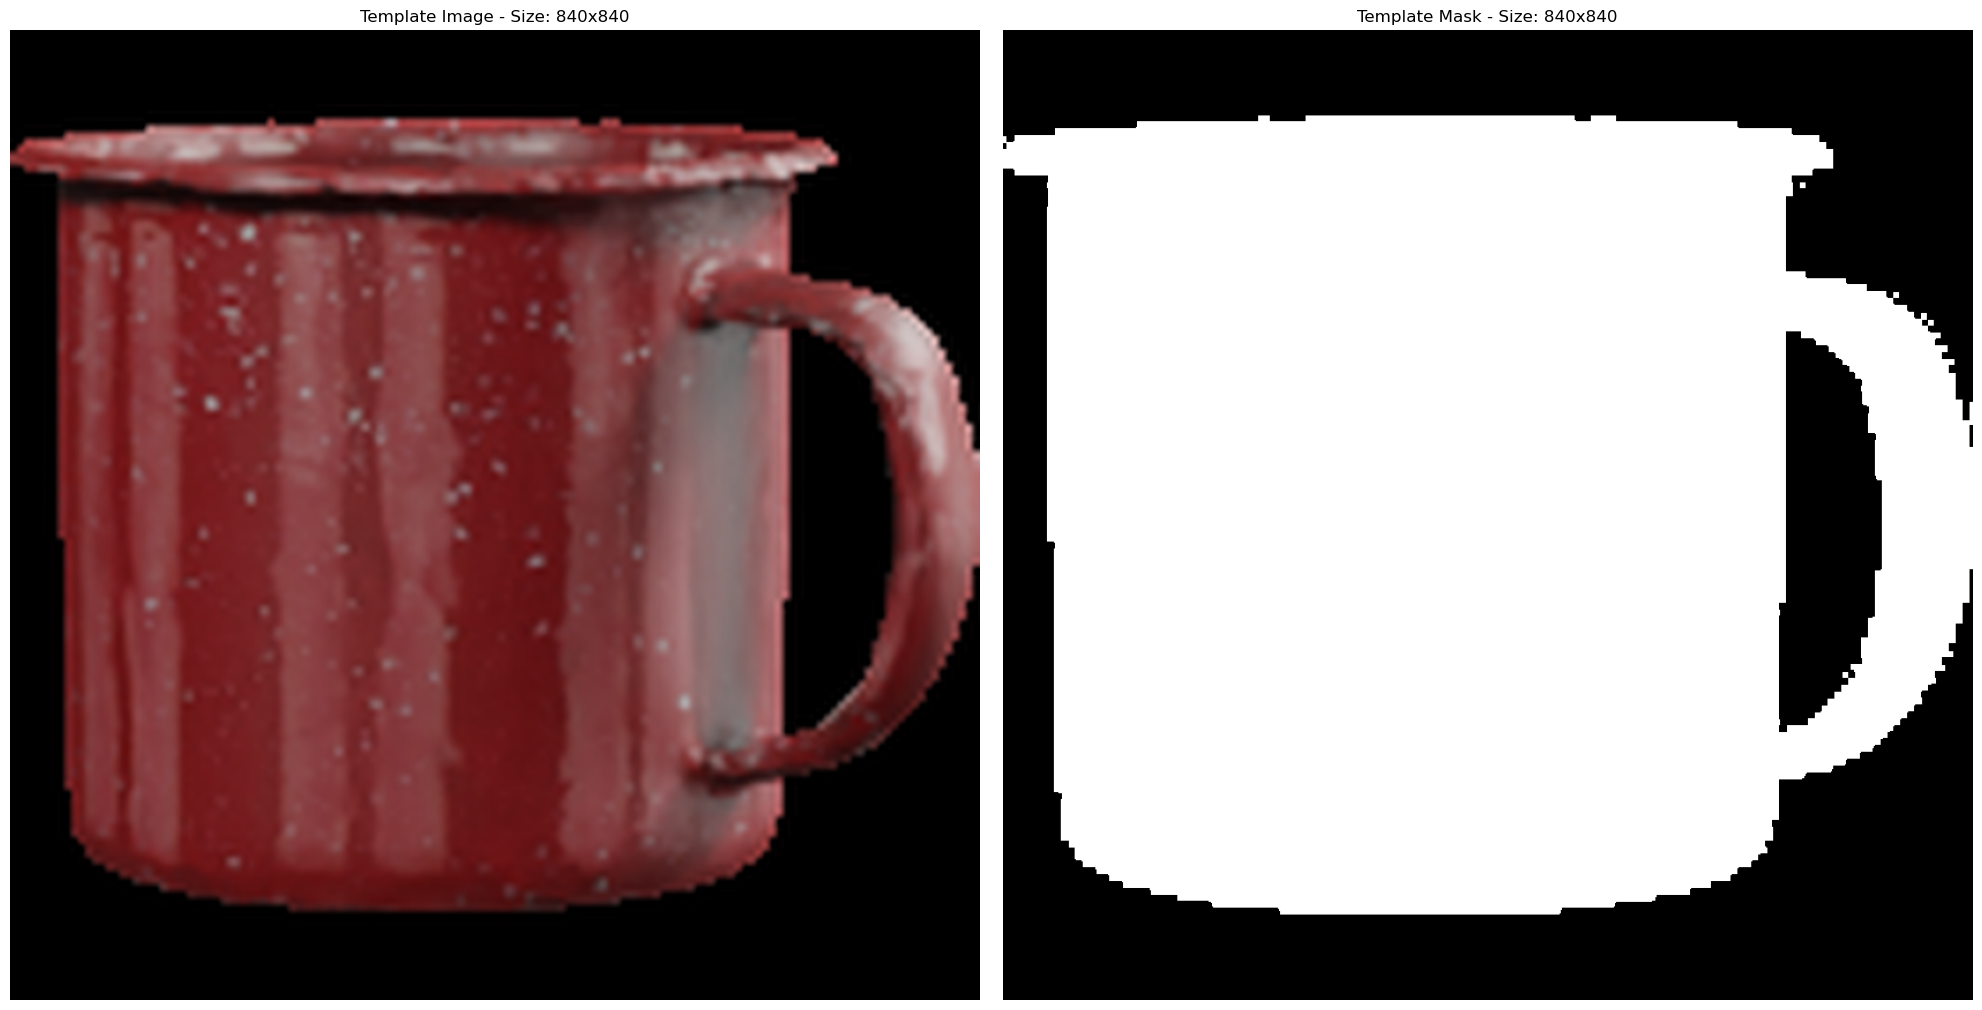

scale_factor:
0.15119047619047618
points1
[(3, 1), (3, 1), (1, 5), (1, 7), (1, 9), (1, 11), (3, 11), (121, 87), (121, 89), (123, 73), (119, 79), (119, 81), (115, 100), (115, 100), (119, 83), (123, 64), (123, 68), (123, 68), (106, 111), (123, 73), (123, 68), (123, 68), (121, 68), (121, 73), (123, 73), (121, 68), (121, 68), (123, 68), (1, 62), (1, 62), (123, 68), (123, 68), (123, 68), (123, 70), (121, 73), (119, 79), (121, 73), (119, 79), (123, 73), (3, 83), (3, 83), (3, 87), (121, 111), (121, 111), (121, 89), (3, 100), (117, 98), (117, 98), (1, 102), (3, 111), (3, 111), (3, 111), (5, 102), (1, 119), (1, 11), (24, 115), (1, 119), (1, 121), (1, 121), (1, 125), (3, 1), (3, 3), (5, 3), (1, 7), (1, 9), (1, 11), (5, 9), (3, 15), (3, 17), (1, 20), (1, 20), (119, 87), (113, 100), (115, 98), (125, 62), (123, 64), (123, 66), (123, 66), (121, 73), (106, 109), (125, 66), (123, 66), (123, 66), (123, 68), (123, 68), (123, 68), (123, 66), (125, 62), (5, 62), (3, 62), (123, 68), (123, 68), (123, 68), (

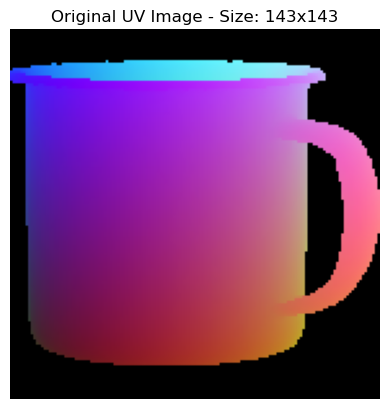

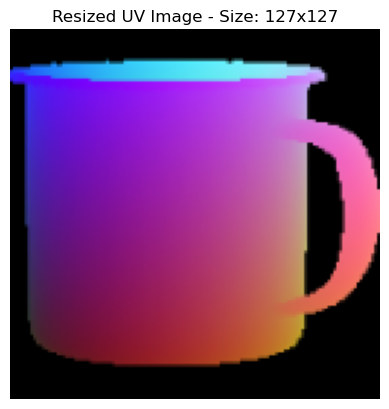

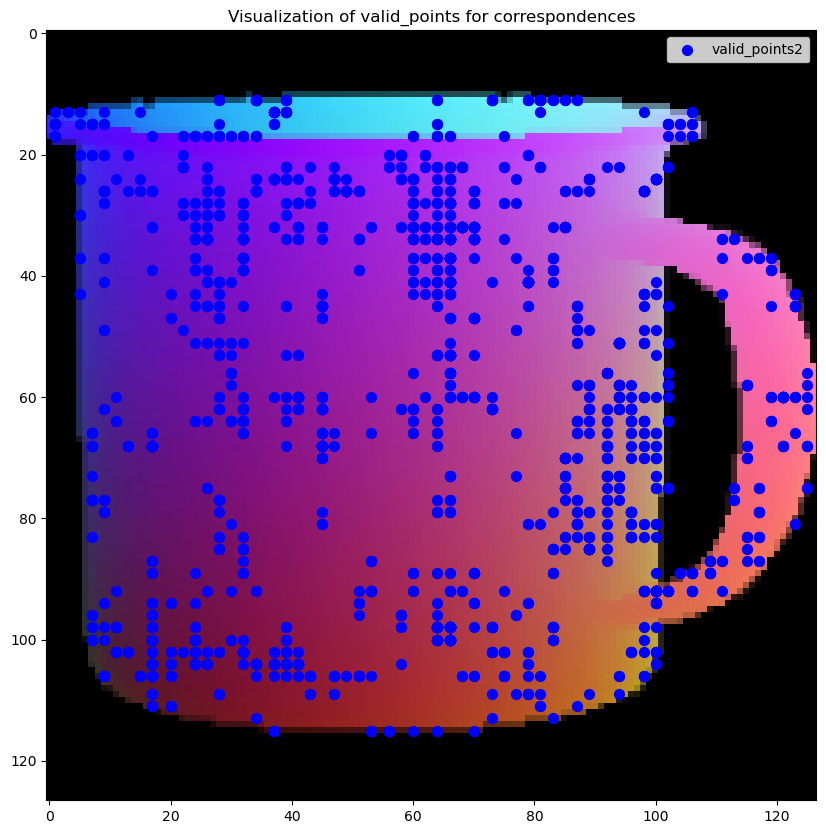

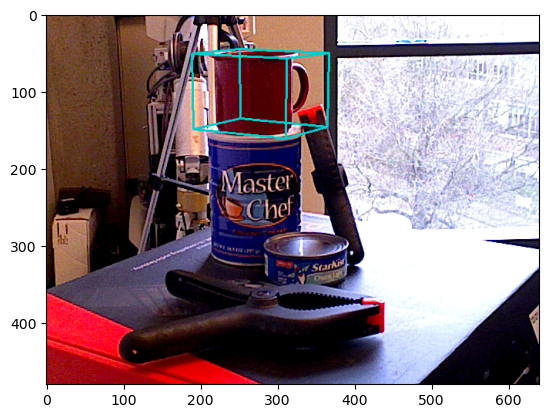

Pose estimation time: 6.568277597427368
R_est: [[ 0.86423523  0.50305102  0.00609486]
 [ 0.12686565 -0.20619821 -0.97025121]
 [-0.48682911  0.8392985  -0.24202365]]
t_est: [ -28.09840244 -119.43653942  902.04505574]


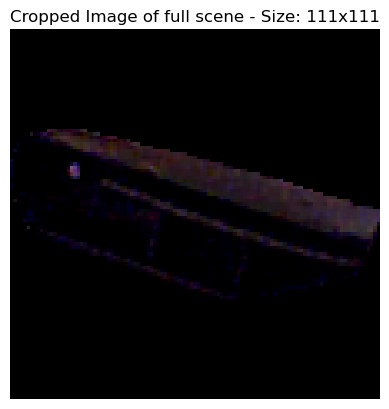

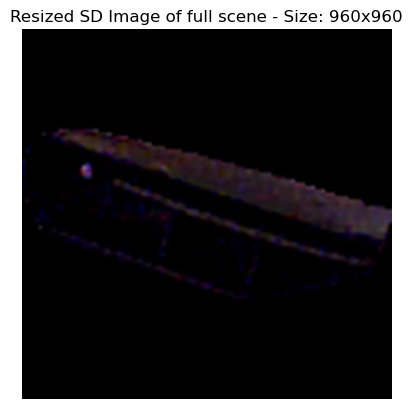

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


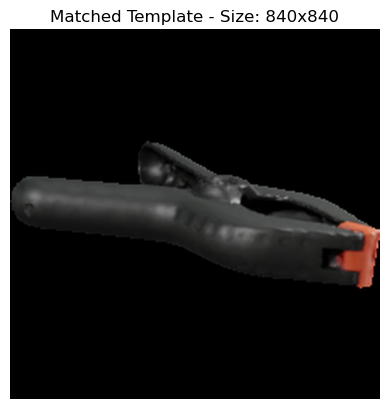

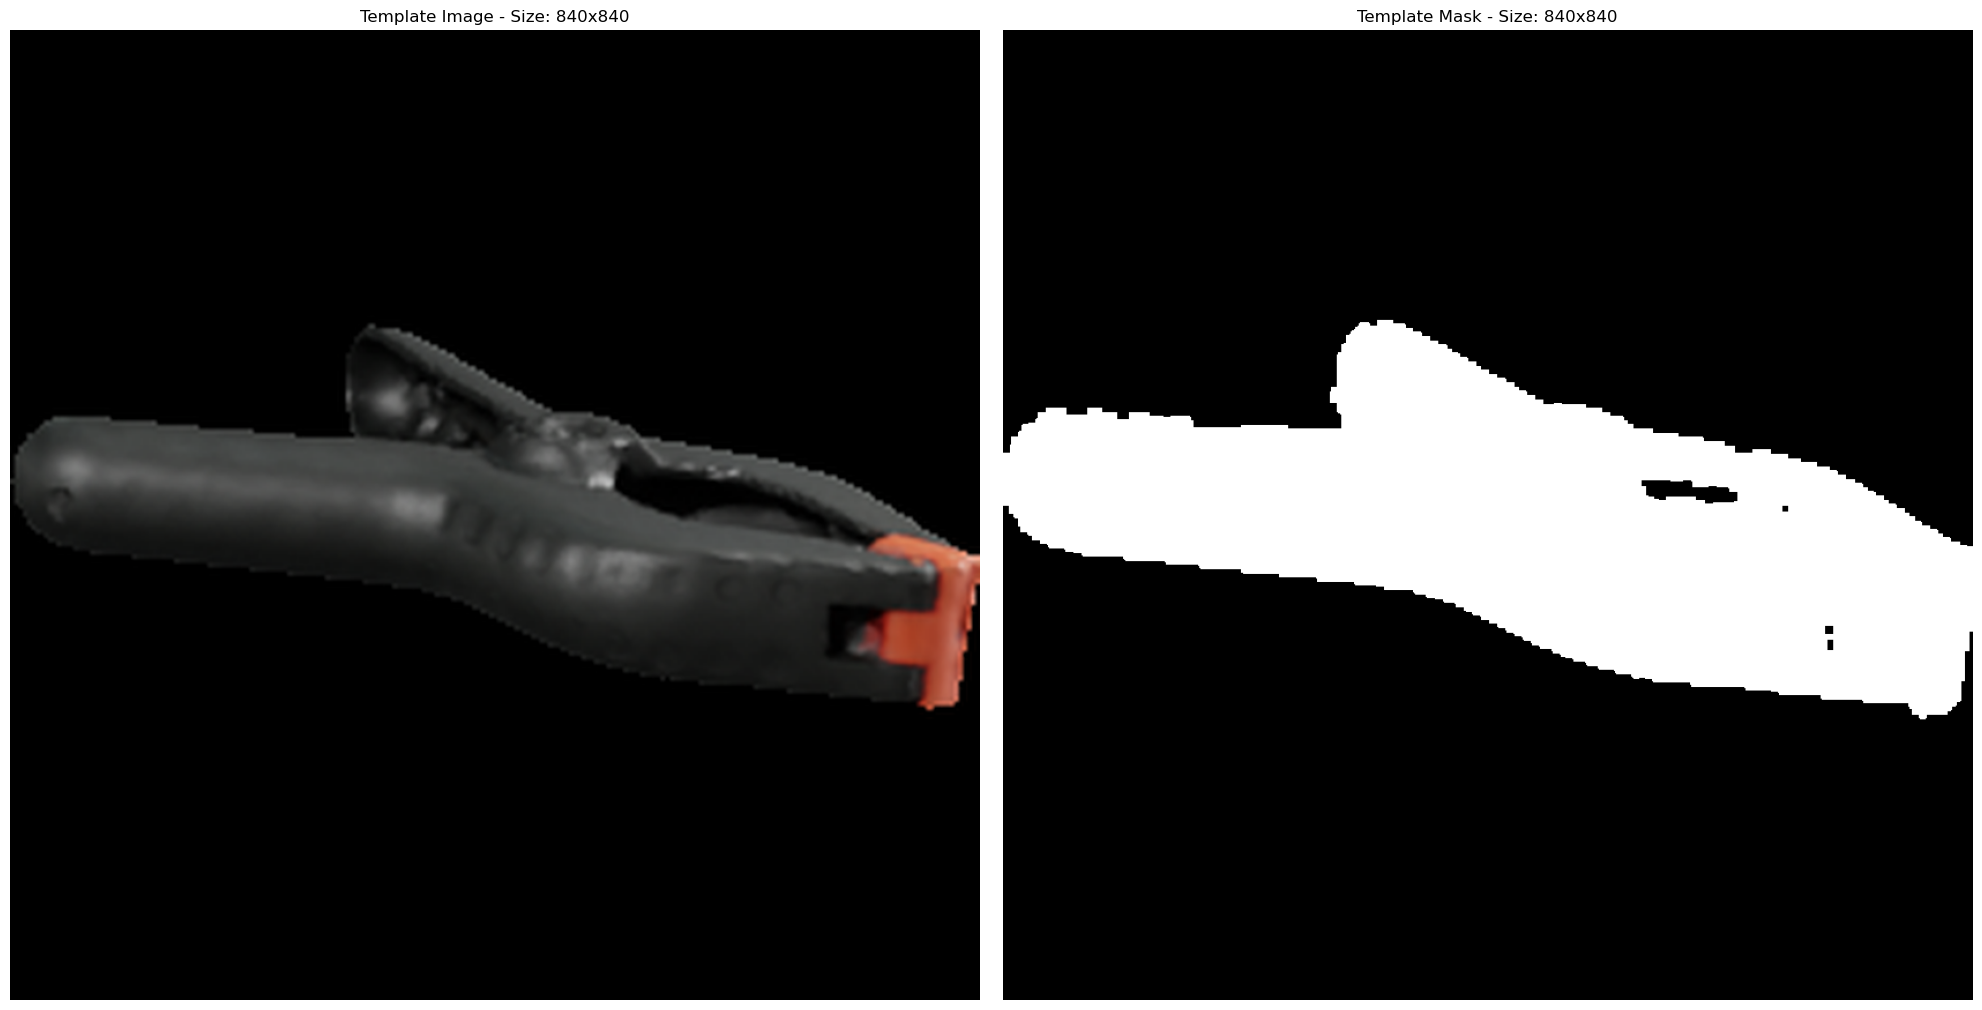

scale_factor:
0.13214285714285715
points1
[(2, 0), (2, 0), (0, 4), (0, 13), (0, 100), (0, 10), (0, 12), (0, 15), (0, 15), (0, 17), (0, 19), (0, 21), (0, 23), (0, 23), (0, 26), (0, 30), (0, 32), (0, 32), (0, 34), (0, 32), (0, 36), (0, 32), (0, 41), (0, 43), (0, 43), (0, 43), (0, 49), (0, 50), (0, 52), (0, 54), (0, 54), (0, 58), (0, 60), (0, 61), (0, 61), (0, 69), (0, 67), (0, 69), (0, 71), (0, 73), (0, 74), (0, 76), (0, 80), (0, 80), (0, 93), (0, 84), (0, 100), (0, 100), (0, 89), (0, 93), (0, 93), (0, 93), (0, 91), (0, 98), (0, 100), (0, 100), (0, 106), (0, 106), (0, 108), (0, 108), (2, 0), (2, 0), (2, 4), (2, 106), (2, 8), (2, 10), (2, 12), (2, 19), (2, 19), (2, 19), (2, 19), (2, 21), (2, 23), (2, 24), (2, 26), (2, 28), (2, 30), (2, 32), (2, 34), (2, 34), (2, 36), (2, 36), (2, 41), (2, 32), (2, 43), (2, 43), (2, 49), (2, 50), (2, 52), (2, 52), (2, 56), (2, 58), (2, 60), (2, 61), (2, 63), (2, 65), (2, 67), (2, 69), (2, 71), (2, 74), (2, 74), (2, 76), (2, 78), (2, 80), (2, 82), (2, 84), 

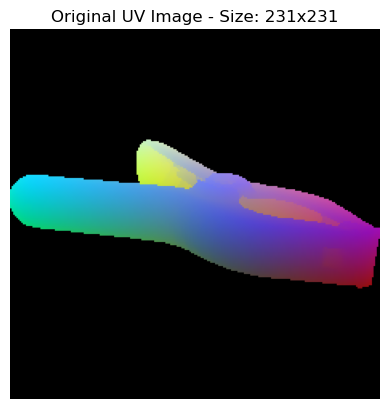

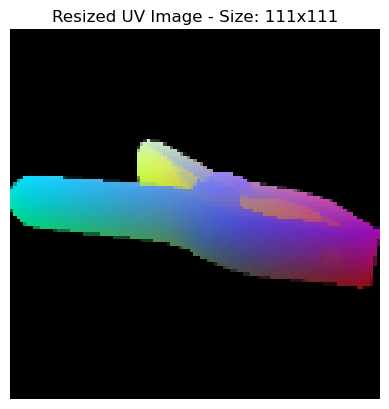

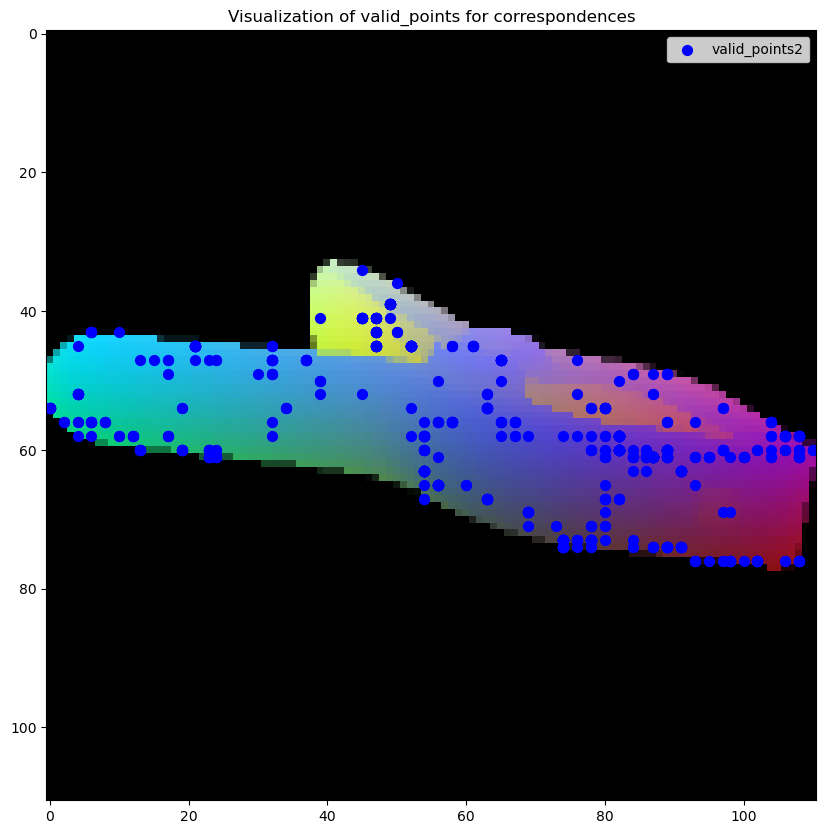

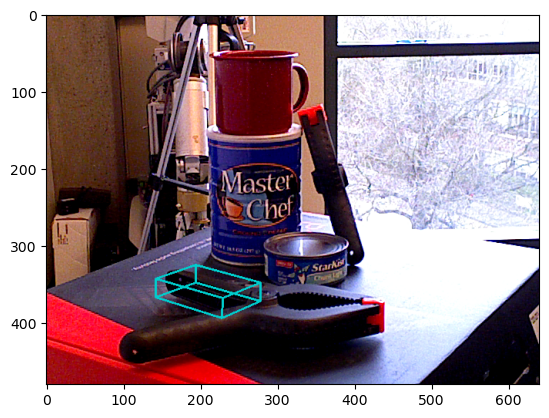

Pose estimation time: 6.64103627204895
R_est: [[ 0.57536081 -0.81703332  0.03763639]
 [-0.16791439 -0.16303188 -0.97222701]
 [ 0.80047779  0.55306163 -0.23099381]]
t_est: [-157.8960724  179.8123421 1647.0125334]


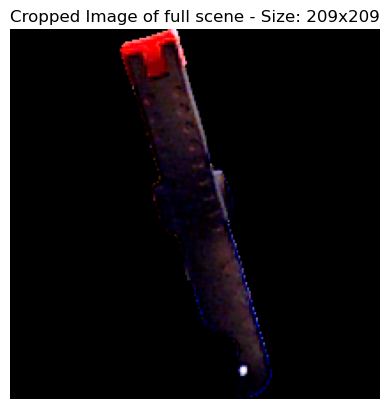

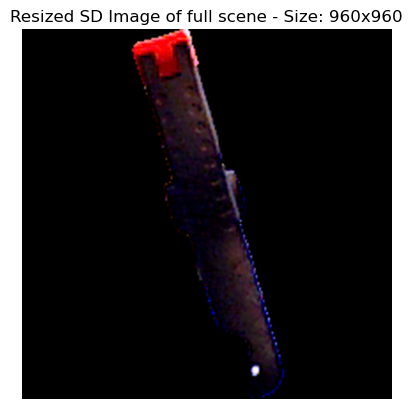

Shape of SD features: torch.Size([1, 1, 3600, 384])
Shape of DINO features: torch.Size([1, 1, 3600, 768])
Shape of SD-DINO features: torch.Size([1, 1, 3600, 1152])


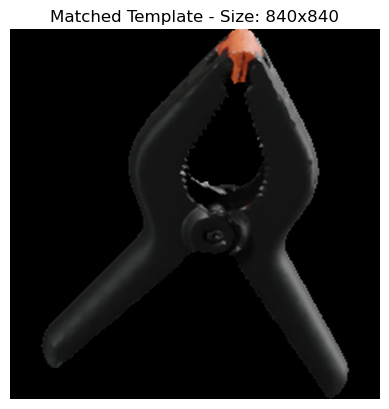

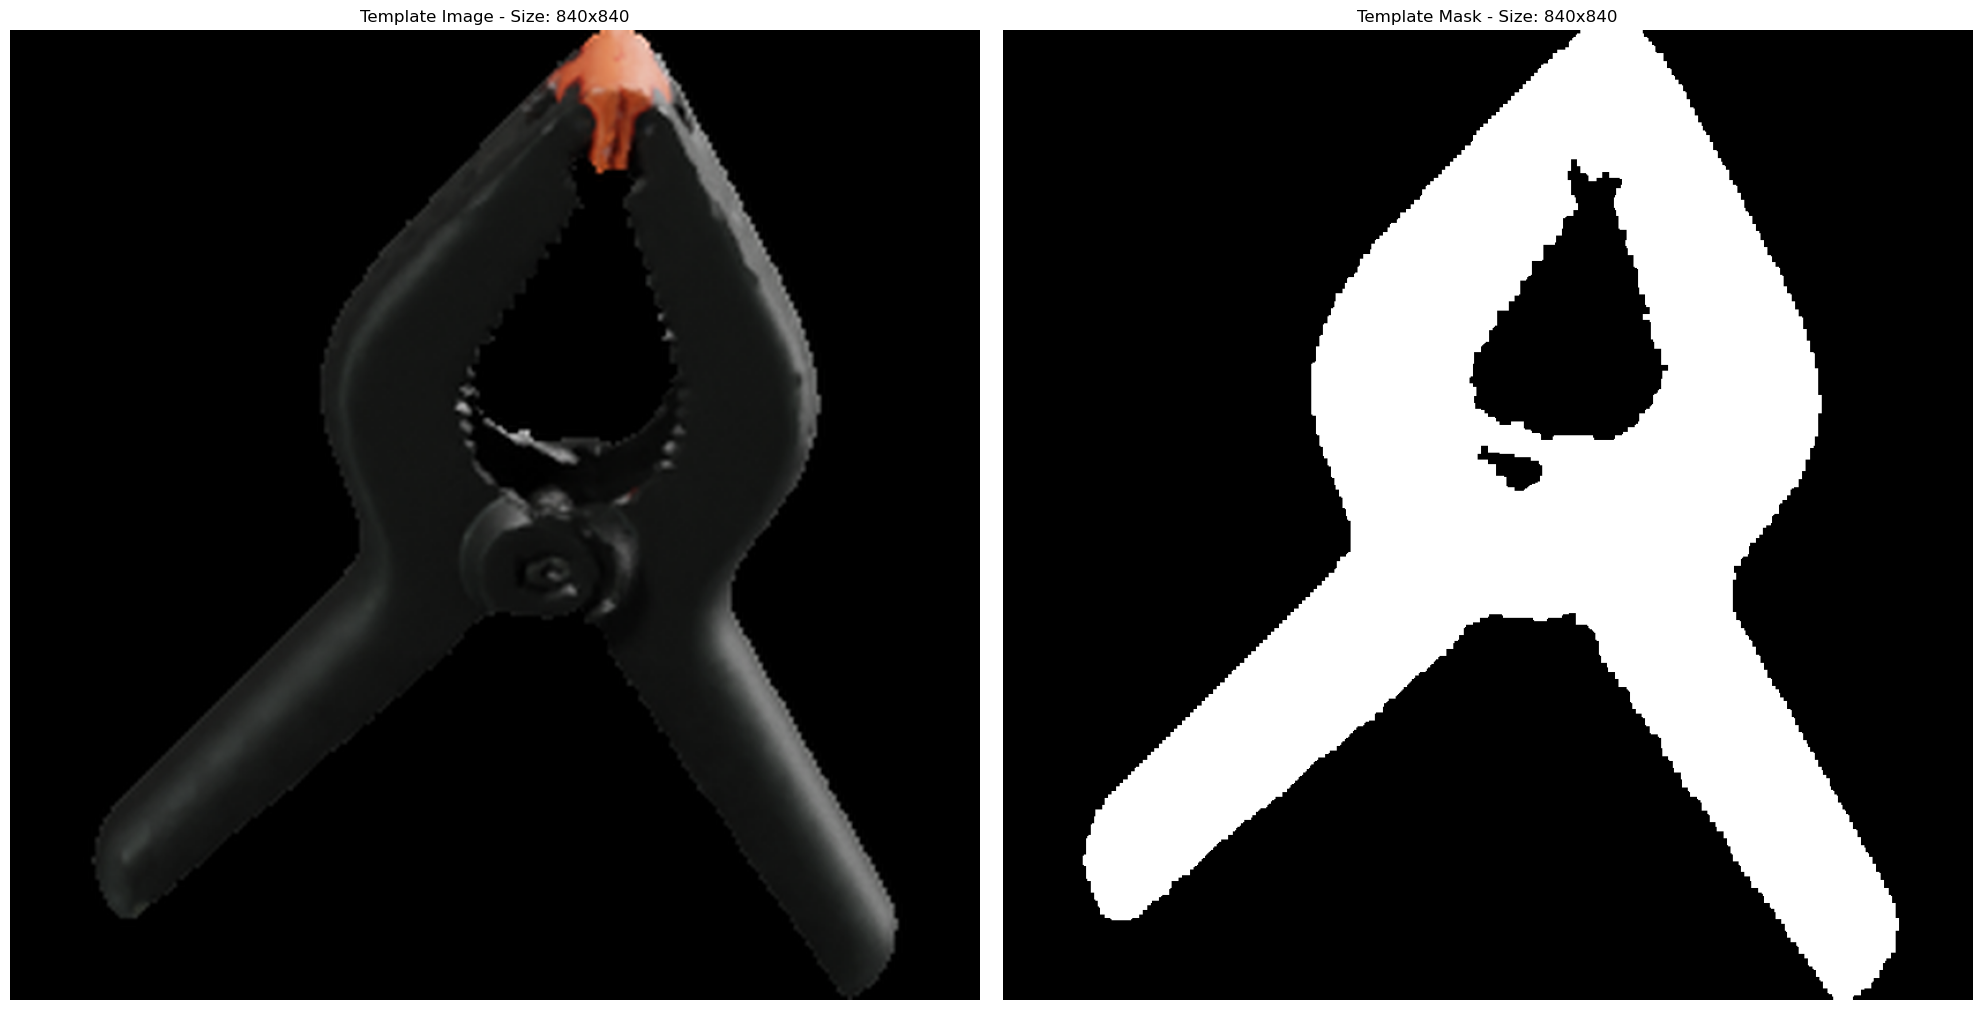

scale_factor:
0.2488095238095238
points1
[(1, 5), (5, 1), (5, 5), (1, 26), (207, 15), (207, 19), (1, 15), (5, 99), (1, 26), (1, 29), (5, 172), (5, 158), (102, 47), (102, 47), (1, 99), (5, 106), (1, 144), (1, 144), (8, 148), (5, 144), (53, 168), (40, 161), (19, 151), (19, 151), (22, 109), (15, 116), (22, 109), (19, 151), (5, 144), (5, 106), (1, 106), (1, 106), (1, 92), (1, 92), (1, 88), (1, 88), (1, 88), (1, 92), (5, 99), (1, 99), (1, 99), (1, 92), (1, 175), (1, 175), (1, 26), (1, 193), (102, 47), (102, 47), (1, 186), (1, 172), (1, 179), (1, 179), (1, 172), (1, 15), (1, 19), (1, 19), (1, 196), (203, 207), (207, 207), (207, 207), (5, 1), (1, 1), (5, 8), (12, 8), (8, 19), (99, 19), (5, 19), (1, 26), (1, 29), (1, 29), (5, 155), (8, 158), (102, 47), (19, 161), (8, 102), (5, 106), (1, 144), (8, 148), (53, 168), (19, 151), (19, 151), (33, 151), (36, 158), (22, 109), (22, 109), (19, 113), (15, 116), (15, 113), (26, 155), (109, 71), (1, 106), (1, 106), (1, 92), (1, 88), (1, 36), (203, 123), (1,

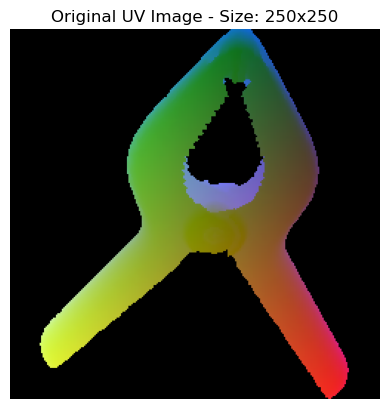

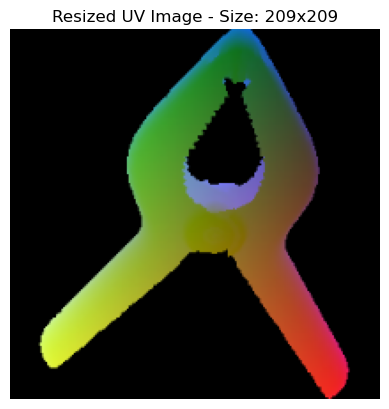

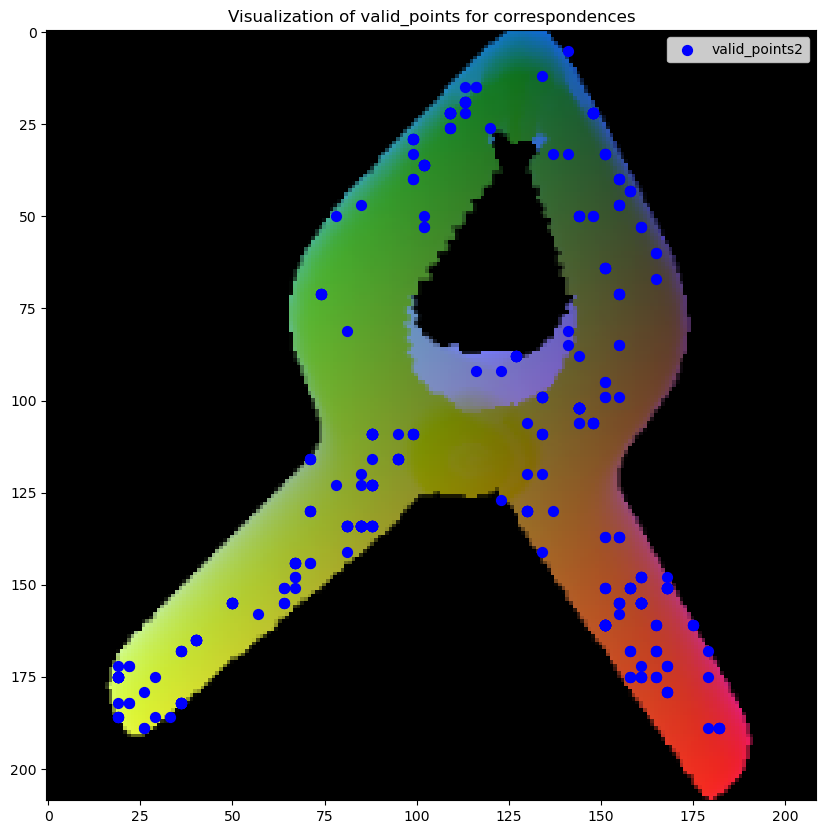

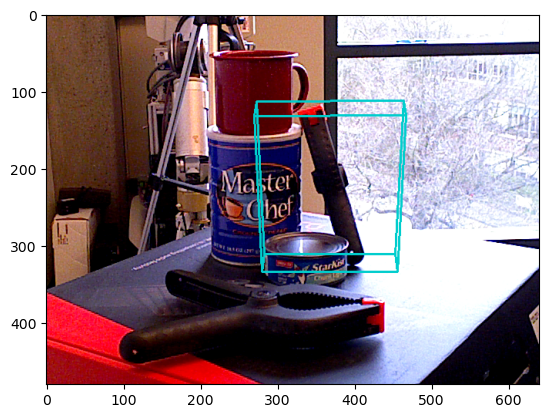

Pose estimation time: 7.1369383335113525
R_est: [[ 0.02495479 -0.99901885  0.03658692]
 [ 0.85062431  0.00199279 -0.52577021]
 [ 0.52518144  0.04424221  0.84983944]]
t_est: [ 49.78953447 -11.54925072 959.58686633]


In [4]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt
import torch


# Loading a ground truth file to access segmentation masks to test zs6d:
with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)

img_id = '000048_1' # for ycbv
#img_id = '36' # for lmo

device = 'cuda' if torch.cuda.is_available() else 'cpu'

patch_size = 14 #extractor.model.patch_embed.patch_size[0]
num_patches = int(patch_size / stride * (image_size_dino // patch_size))



for i in range(len(data_gt[img_id])): 
    obj_number = i
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = "./test/000002.png"
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est = pose_estimator_sd_dino.get_pose(num_patches, img, str(obj_id), mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    plt.imshow(out_img)
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")
